In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [2]:
df = pd.read_csv("Speeddating_Processed.csv")
df = df.drop(["Unnamed: 0", "has_null", "wave", "interests_correlate", "guess_prob_liked", "decision", "decision_o", "met"], axis=1)
df = df.drop([col for col in df if col.startswith("d_")], axis=1)
df = df.drop([col for col in df if "_o" in col], axis=1)

for ind, row in df.iterrows():
    if row["gender"] == "female":
        df.loc[ind, "gender"] = 1
    elif row["gender"] == "male":
        df.loc[ind, "gender"] = 0

df = df.join(pd.get_dummies(df.pop("race"), dtype=int))

# Field Column One Hot Encoded or Dropped
# df = df.join(pd.get_dummies(df.pop("field"), dtype=int))
df = df.drop("field", axis=1)

df.head()

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,...,shopping,yoga,expected_happy_with_sd_people,like,match,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other
0,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,7.0,0,1,0,0,0,0
1,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,7.0,0,1,0,0,0,0
2,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,7.0,1,1,0,0,0,0
3,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,6.0,1,1,0,0,0,0
4,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,6.0,0,1,0,0,0,0


In [3]:
pd.set_option('display.max_columns', None)
tempDF = df.drop("match", axis=1)

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(tempDF)
scaled_df = pd.DataFrame(scaled_arr, index=tempDF.index, columns=tempDF.columns).join(df.loc[:,"match"])

scaled_df

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other,match
0,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-0.102716,1.052405,-0.252673,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,0
1,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,0.413380,0.470444,-0.252673,0.818641,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,0
2,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,0.413380,-0.693478,0.405775,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,1
3,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-0.618812,-0.693478,-0.252673,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,-0.086090,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,1
4,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-1.134908,1.052405,-0.252673,-1.258012,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,-0.086090,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,-1.000707,-0.371125,1.223520,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,0.413380,-1.275439,-1.569571,-0.738849,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-1.188927,-0.566747,-0.223574,0.879373,-0.290812,-0.268795,0
7075,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.651004,-1.275439,-1.569571,-0.738849,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-2.291764,-0.566747,-0.223574,0.879373,-0.290812,-0.268795,0
7076,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.134908,-0.693478,0.405775,-1.258012,0.602823,-0.923651,-0.528424,1

In [4]:
X = scaled_df.drop("match", axis=1)
y = scaled_df["match"]

[Text(0.375, 0.9285714285714286, 'X[38] <= 0.052\ngini = 0.29\nsamples = 5309\nvalue = [4375, 934]'),
 Text(0.16666666666666666, 0.7857142857142857, 'X[38] <= -0.5\ngini = 0.141\nsamples = 2872\nvalue = [2653, 219]'),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.069\nsamples = 1733\nvalue = [1671, 62]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.238\nsamples = 1139\nvalue = [982, 157]'),
 Text(0.5833333333333334, 0.7857142857142857, 'X[19] <= 0.689\ngini = 0.415\nsamples = 2437\nvalue = [1722, 715]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[24] <= -2.767\ngini = 0.344\nsamples = 1144\nvalue = [891, 253]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.5, 'gini = 0.34\nsamples = 1137\nvalue = [890, 247]'),
 Text(0.75, 0.6428571428571429, 'X[39] <= 0.599\ngini = 0.459\nsamples = 1293\nvalue = [831, 462]'),
 Text(0.6666666666666666, 0.5, 'X[36] <= 0.417\ngini = 0.473\nsamples = 1048\nvalue = [646, 402]'),
 Text(0.5, 0.357142

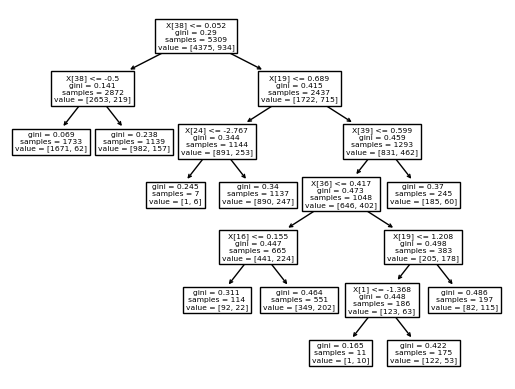

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Create Decision Tree classifer 
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Plot decision tree
tree.plot_tree(clf)

In [6]:
# predictions, accuracy, recall, f1 score
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
rec = recall_score(y_test, preds)

acc, f1, rec

(0.8242937853107345, 0.15718157181571815, 0.09666666666666666)

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.036710
Feature: 2, Score: 0.000000
Feature: 3, Score: 0.000000
Feature: 4, Score: 0.000000
Feature: 5, Score: 0.000000
Feature: 6, Score: 0.000000
Feature: 7, Score: 0.000000
Feature: 8, Score: 0.000000
Feature: 9, Score: 0.000000
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000000
Feature: 12, Score: 0.000000
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.000000
Feature: 15, Score: 0.000000
Feature: 16, Score: 0.027482
Feature: 17, Score: 0.000000
Feature: 18, Score: 0.000000
Feature: 19, Score: 0.164045
Feature: 20, Score: 0.000000
Feature: 21, Score: 0.000000
Feature: 22, Score: 0.000000
Feature: 23, Score: 0.000000
Feature: 24, Score: 0.027495
Feature: 25, Score: 0.000000
Feature: 26, Score: 0.000000
Feature: 27, Score: 0.000000
Feature: 28, Score: 0.000000
Feature: 29, Score: 0.000000
Feature: 30, Score: 0.000000
Feature: 31, Score: 0.000000
Feature: 32, Score: 0.000000
Feature: 33, Score: 0.000000
Feature: 34, Score: 0.00

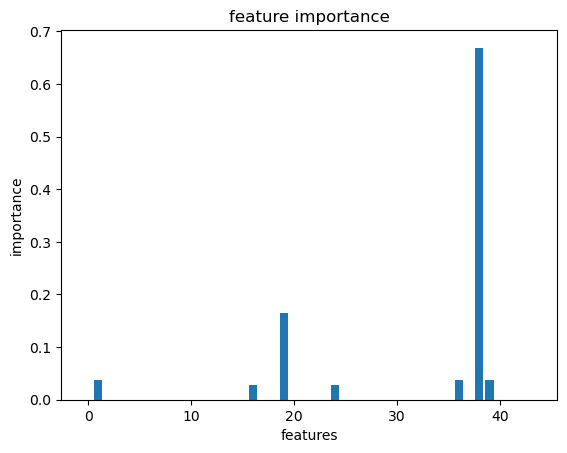

In [7]:
import matplotlib.pyplot as plt

# get feature importance for decision tree
importance = clf.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('feature importance')
plt.show()

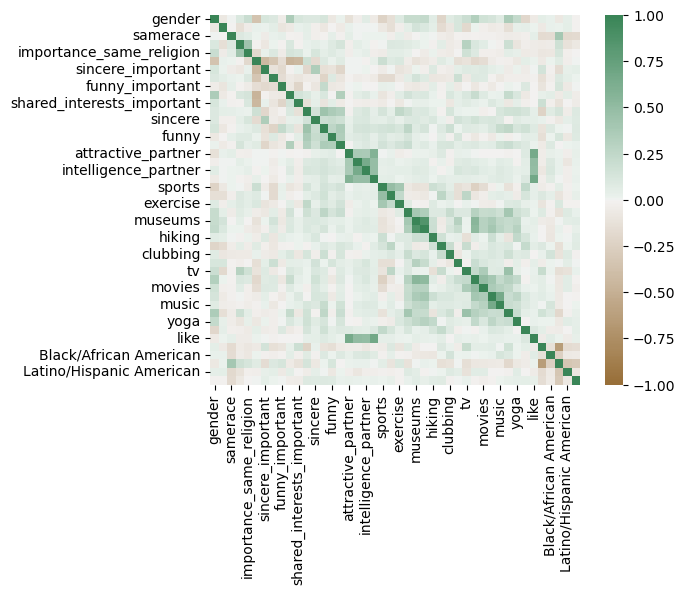

In [8]:
import seaborn as sns

correlation = X.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [9]:
correlation

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other
gender,1.000000,-0.077610,0.006630,0.103693,0.202648,-0.355964,0.122644,0.097067,-0.045807,0.355723,0.121345,0.096084,0.100504,0.126175,-0.077054,0.022602,-0.125608,-0.035141,0.065629,-0.056002,-0.226934,-0.142581,0.082061,0.215890,0.217109,0.227395,0.069371,-0.216732,0.076368,0.121135,0.189494,0.321091,0.156326,0.135952,0.077477,0.352110,0.231617,-0.200871,-0.059121,0.051302,0.025716,-0.072589,0.044049,-0.013151
age,-0.077610,1.000000,-0.003879,-0.143014,-0.047503,0.026161,0.015857,0.055262,-0.094488,-0.064854,0.023781,0.051767,-0.028368,-0.078783,-0.006318,-0.060658,0.027366,0.002573,0.005224,0.003232,-0.076071,-0.145873,-0.036891,0.051476,0.143199,0.104648,0.050438,-0.170279,-0.087609,0.120166,-0.185279,0.012694,-0.026840,-0.061858,-0.042974,-0.141556,0.034359,0.043277,0.010397,-0.065201,0.030236,0.018707,0.053415,-0.008252
samerace,0.006630,-0.003879,1.000000,0.100049,0.064282,0.014196,-0.048071,0.024733,0.043756,-0.014692,-0.020065,0.039960,-0.027995,-0.009885,0.039730,-0.016592,0.050389,0.002726,0.011408,0.015395,0.010659,-0.034912,0.040582,-0.051148,-0.003503,0.015108,0.006257,-0.046299,-0.065756,-0.012167,-0.021809,-0.015163,-0.021330,-0.023121,-0.032773,-0.052846,-0.045528,-0.025161,0.041665,-0.169514,-0.162421,0.404790,-0.187151,-0.172539
importance_same_race,0.103693,-0.143014,0.100049,1.000000,0.435749,-0.008835,-0.078479,0.008695,-0.008304,0.111048,-0.014497,0.030817,0.053594,0.023792,0.082368,0.136402,-0.026309,0.051584,0.020367,-0.013379,0.005035,0.099068,0.092627,0.074674,0.053019,0.010546,-0.023167,0.061742,-0.057883,-0.036292,0.302909,0.113683,0.067362,0.003607,-0.022989,0.185838,-0.099388,-0.031838,-0.053358,-0.057679,-0.051011,0.176237,-0.123892,-0.074084
importance_same_religion,0.202648,-0.047503,0.064282,0.435749,1.000000,-0.180816,0.024894,0.095268,-0.048793,0.136796,0.116718,0.017433,0.119395,0.052507,0.085279,0.042410,-0.035234,0.020473,0.042060,-0.033576,-0.051826,0.061049,0.057451,0.034114,-0.003024,-0.051184,0.020243,-0.045741,-0.062145,-0.001672,0.167322,0.089870,-0.028862,-0.026995,-0.041464,0.059091,0.038498,-0.057097,-0.051910,-0.092542,-0.079959,0.131649,-0.028427,-0.003746
attractive_important,-0.355964,0.026161,0.014196,-0.008835,-0.180816,1.000000,-0.422142,-0.333708,-0.155596,-0.476307,-0.443961,0.172970,-0.168466,0.087607,0.018877,0.070480,0.006182,0.005976,-0.008625,0.038284,0.192419,0.085754,0.107791,-0.044381,-0.124934,-0.079770,-0.045848,0.077379,0.030849,-0.146459,-0.112851,-0.192152,-0.155547,-0.047803,-0.021650,-0.029481,-0.073943,0.047607,0.019524,-0.069798,0.008328,0.073903,-0.036614,0.005331
sincere_important,0.122644,0.015857,-0.048071,-0.078479,0.024894,-0.422142,1.000000,-0.123018,-0.181275,-0.009303,0.024835,-0.202420,0.344573,-0.140408,-0.111539,-0.207313,0.006317,0.001988,0.012144,-0.003855,-0.048465,0.004547,-0.106127,-0.075882,0.014147,-0.027816,0.088681,-0.025296,-0.051998,0.052955,0.085483,0.078031,0.087620,0.049906,0.026468,-0.048890,0.018488,-0.053164,0.006602,0.141825,-0.016807,-0.159789,0.036124,0.049040
intellicence_important,0.097067,0.055262,0.024733,0.008695,0.095268,-0.333708,-0.123018,1.000000,-0.158508,-0.062554,-0.095774,-0.060907,-0.047224,-0.219619,0.092075,-0.098119,-0.011407,-0.049305,-0.037953,-0.056880,-0.173614,-0.176272,-0.069414,0.057597,0.141455,0.080087,-0.093686,-0.081176,-0.069972,0.180159,-0.063549,0.092925,0.081259,-0.012655,-0.077287,-0.037033,-0.032048,-0.038247,-0.

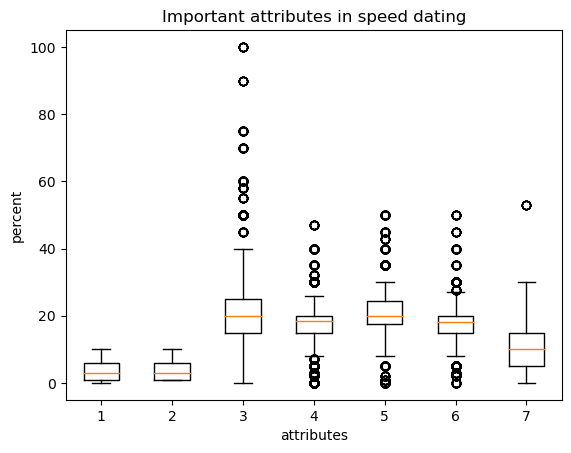

In [11]:
important_attrs = df[['importance_same_race', 'importance_same_religion', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important']]

plt.boxplot(important_attrs)
plt.title('Important attributes in speed dating')
plt.xlabel('attributes')
plt.ylabel('percent')

plt.show()

In [46]:
print('same race (1):', sdpp['importance_same_race'].min(), sdpp['importance_same_race'].max(), sdpp['importance_same_race'].median())
print('same religion (2):', sdpp['importance_same_religion'].min(), sdpp['importance_same_religion'].max(), sdpp['importance_same_religion'].median())
print('attractive (3):', sdpp['attractive_important'].min(), sdpp['attractive_important'].max(), sdpp['attractive_important'].median())
print('sincere (4):', sdpp['sincere_important'].min(), sdpp['sincere_important'].max(), sdpp['sincere_important'].median())
print('intelligence (5):', sdpp['intellicence_important'].min(), sdpp['intellicence_important'].max(), sdpp['intellicence_important'].median())
print('funny (6):', sdpp['funny_important'].min(), sdpp['funny_important'].max(), sdpp['funny_important'].median())
print('ambition (7):', sdpp['ambtition_important'].min(), sdpp['ambtition_important'].max(), sdpp['ambtition_important'].median())

same race (1): 0.0 10.0 3.0
same religion (2): 1.0 10.0 3.0
attractive (3): 0.0 100.0 20.0
sincere (4): 0.0 47.0 18.37
intelligence (5): 0.0 50.0 20.0
funny (6): 0.0 50.0 18.0
ambition (7): 0.0 53.0 10.0


In [12]:
sdpp = pd.read_csv("Speeddating_Processed.csv")
sdpp

,Unnamed: 0,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,9.0,8.0,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,6.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
3,4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,[2-5],[2-5],Law,30.0,10.0,20.0,10.0,10.0,20.0,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8.0,7.0,9.0,6.0,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[

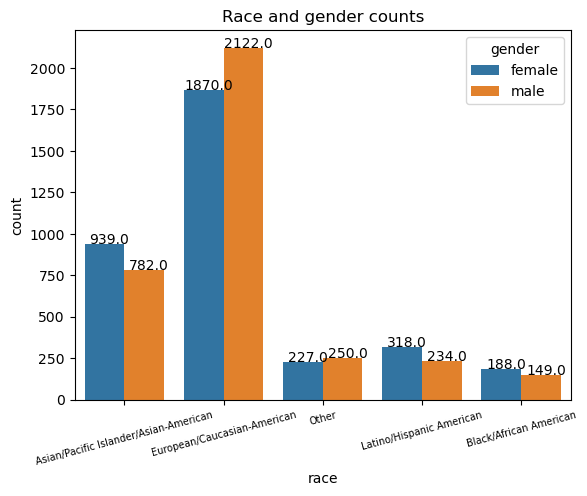

In [30]:
ax = sns.countplot(sdpp, x = 'race', hue = 'gender')
plt.xticks(rotation = 15, fontsize = 7)
plt.title('Race and gender counts')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), ha = "center")

[Text(0.40154593686648604, 0.9814814814814815, 'X[38] <= 0.052\ngini = 0.29\nsamples = 5309\nvalue = [4375, 934]'),
 Text(0.14170626622269378, 0.9444444444444444, 'X[38] <= -0.5\ngini = 0.141\nsamples = 2872\nvalue = [2653, 219]'),
 Text(0.056274097213012256, 0.9074074074074074, 'X[19] <= -0.349\ngini = 0.069\nsamples = 1733\nvalue = [1671, 62]'),
 Text(0.0389468985051439, 0.8703703703703703, 'X[8] <= 4.122\ngini = 0.035\nsamples = 1108\nvalue = [1088, 20]'),
 Text(0.03134295485117751, 0.8333333333333334, 'X[10] <= 1.978\ngini = 0.032\nsamples = 1100\nvalue = [1082, 18]'),
 Text(0.024622970387071105, 0.7962962962962963, 'X[7] <= 4.011\ngini = 0.029\nsamples = 1086\nvalue = [1070, 16]'),
 Text(0.014820674106212463, 0.7592592592592593, 'X[20] <= -1.508\ngini = 0.027\nsamples = 1082\nvalue = [1067, 15]'),
 Text(0.005153369583751729, 0.7222222222222222, 'X[12] <= -2.705\ngini = 0.084\nsamples = 114\nvalue = [109, 5]'),
 Text(0.003940812034633675, 0.6851851851851852, 'gini = 0.0\nsamples = 

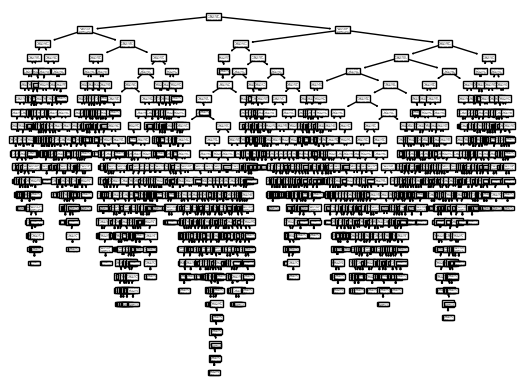

In [14]:
X = scaled_df.drop("match", axis=1)
y = scaled_df["match"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Create Decision Tree classifer 
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Plot decision tree
tree.plot_tree(clf)

In [15]:
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
rec = recall_score(y_test, preds)

acc, f1, rec

(0.7796610169491526, 0.3848580441640379, 0.4066666666666667)

Feature: 0, Score: 0.000305
Feature: 1, Score: 0.023300
Feature: 2, Score: 0.032917
Feature: 3, Score: 0.014952
Feature: 4, Score: 0.016108
Feature: 5, Score: 0.015975
Feature: 6, Score: 0.020863
Feature: 7, Score: 0.017554
Feature: 8, Score: 0.023170
Feature: 9, Score: 0.021454
Feature: 10, Score: 0.020443
Feature: 11, Score: 0.015480
Feature: 12, Score: 0.012252
Feature: 13, Score: 0.004634
Feature: 14, Score: 0.010380
Feature: 15, Score: 0.019740
Feature: 16, Score: 0.085979
Feature: 17, Score: 0.085704
Feature: 18, Score: 0.058368
Feature: 19, Score: 0.072852
Feature: 20, Score: 0.015448
Feature: 21, Score: 0.013101
Feature: 22, Score: 0.009064
Feature: 23, Score: 0.021122
Feature: 24, Score: 0.013563
Feature: 25, Score: 0.006461
Feature: 26, Score: 0.009741
Feature: 27, Score: 0.010367
Feature: 28, Score: 0.027487
Feature: 29, Score: 0.015346
Feature: 30, Score: 0.017870
Feature: 31, Score: 0.014362
Feature: 32, Score: 0.014144
Feature: 33, Score: 0.018094
Feature: 34, Score: 0.01

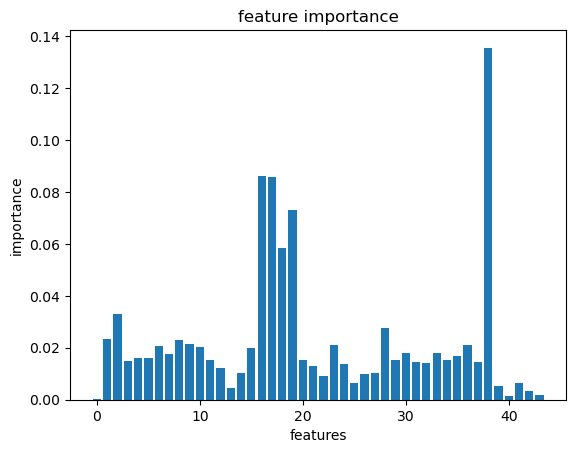

In [16]:
import matplotlib.pyplot as plt

# get feature importance for decision tree
importance = clf.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('feature importance')
plt.show()

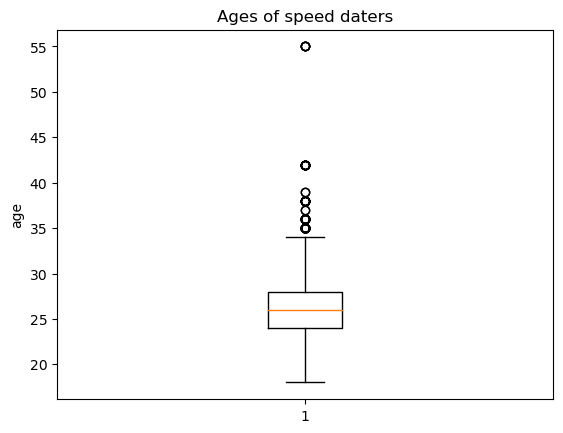

In [37]:
ages = sdpp[['age']]

plt.boxplot(ages)
plt.title('Ages of speed daters')
plt.ylabel('age')

plt.show()

In [52]:
print(sdpp['age'].min(), sdpp['age'].max(), sdpp['age'].median())

18.0 55.0 26.0


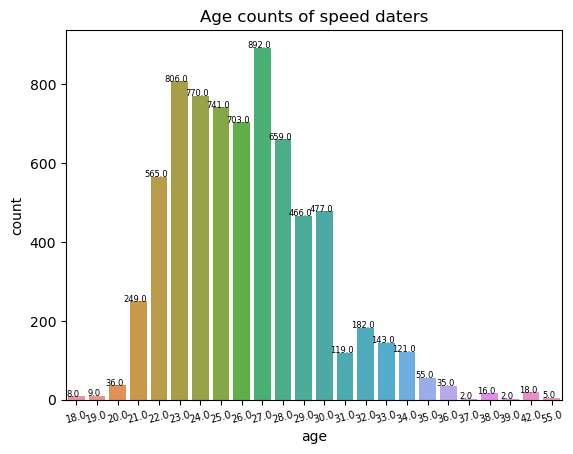

In [51]:
ax = sns.countplot(sdpp, x = 'age')
plt.xticks(rotation = 15, fontsize = 7)
plt.title('Age counts of speed daters')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), ha = "center", fontsize = 6)

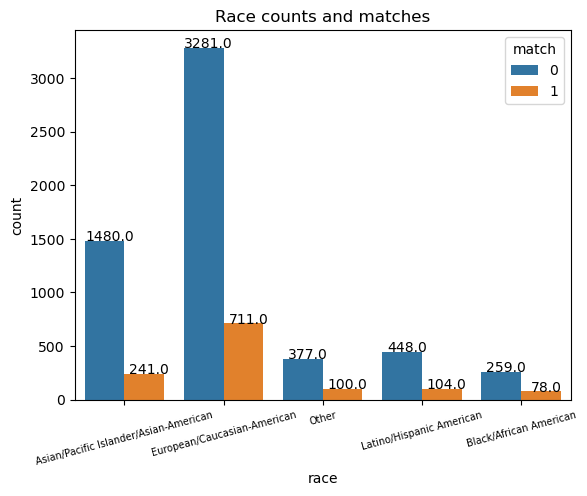

In [33]:
ax = sns.countplot(sdpp, x = 'race', hue = 'match')
plt.xticks(rotation = 15, fontsize = 7)
plt.title('Race counts and matches')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), ha = "center")